<a href="https://colab.research.google.com/github/Vaddisaimanikanta/POWER-BI-PROJECTS/blob/main/Amazon_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

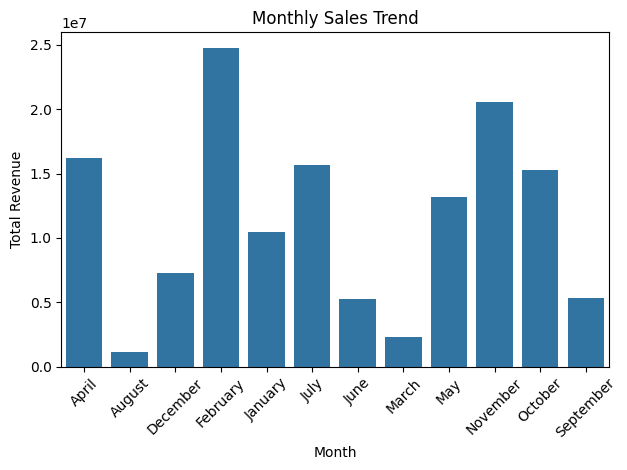

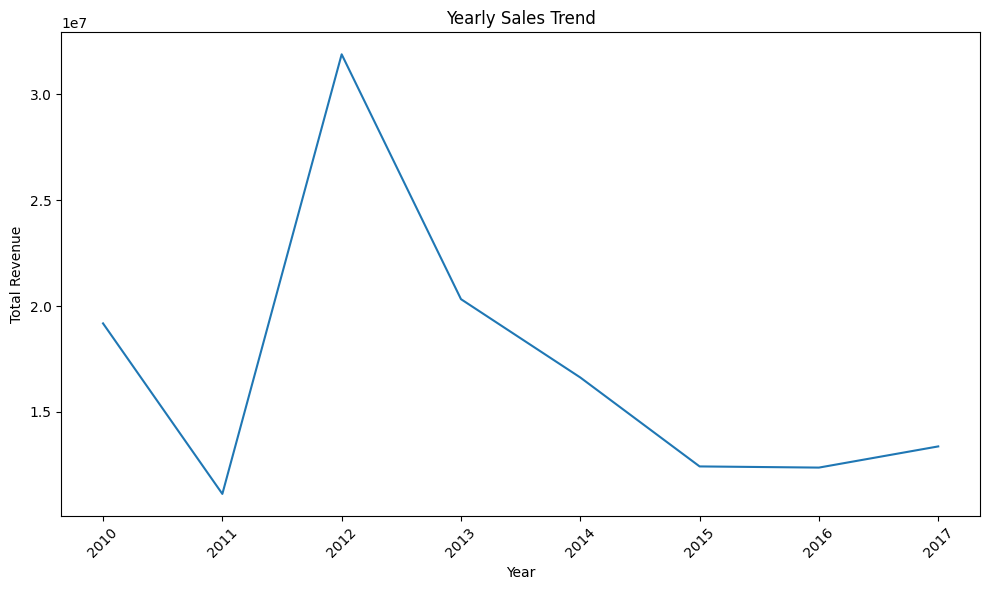

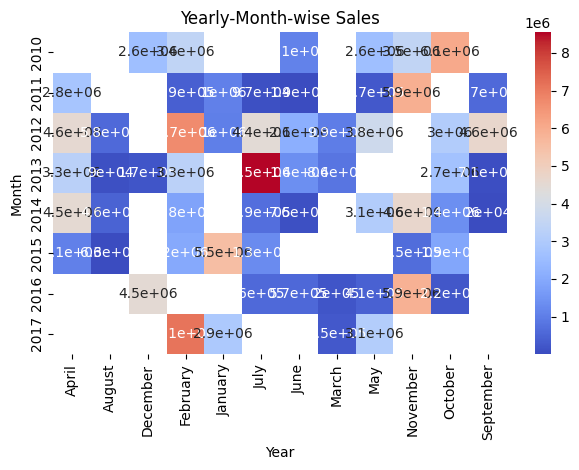

<ipython-input-1-c96bbeff4357>:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


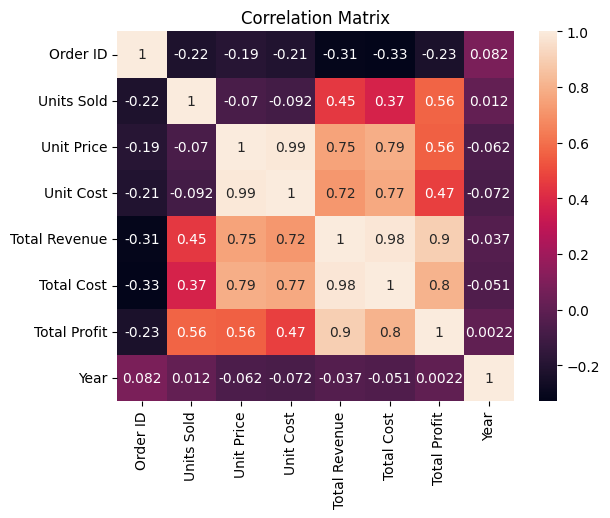

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_data(filepath):
    """Loads data from an Excel file and performs basic cleaning."""
    data = pd.read_csv("/content/Amazon Sales data.csv")
    # Convert 'order date' to datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    # Extract year and month for trend analysis
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month_name()
    return data


def calculate_trends(data):
    """Calculates month-wise, year-wise, and yearly-month-wise sales trends."""
    monthly_sales = data.groupby('Month')['Total Revenue'].sum()
    yearly_sales = data.groupby('Year')['Total Revenue'].sum()
    yearly_monthly_sales = data.pivot_table(
        index='Year', columns='Month', values='Total Revenue', aggfunc='sum'
    )
    return monthly_sales, yearly_sales, yearly_monthly_sales


def visualize_trends(monthly_sales, yearly_sales, yearly_monthly_sales):
    """Creates visualizations for sales trends."""
    # Month-wise sales
    sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Year-wise sales
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_sales.index, yearly_sales.values)
    plt.title("Yearly Sales Trend")
    plt.xlabel("Year")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Yearly-month-wise sales
    sns.heatmap(yearly_monthly_sales, annot=True, cmap='coolwarm')
    plt.title("Yearly-Month-wise Sales")
    plt.xlabel("Year")
    plt.ylabel("Month")
    plt.tight_layout()
    plt.show()


def analyze_relationships(data):
    """Analyzes correlations among attributes (example with heatmap)."""
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title("Correlation Matrix")
    plt.show()


def main():
    # Replace 'data.xlsx' with the actual path to your Excel file
    data = load_data('/content/Amazon Sales data.csv')
    monthly_sales, yearly_sales, yearly_monthly_sales = calculate_trends(data)
    visualize_trends(monthly_sales, yearly_sales, yearly_monthly_sales)
    analyze_relationships(data)


if __name__ == "__main__":
    main()
